In [1]:
#读取txt
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt
%matplotlib inline

In [2]:
def low_pass_filter(HigHz, data):
    data = np.squeeze(data)
    hf = HigHz * 2.0 / 1000
    N = 4
    b, a = butter(N, hf, "lowpass")
    filted_data = filtfilt(b, a, data)
    return filted_data

In [3]:
def band_pass_filter(LowHz, HigHz, data):
    data = np.squeeze(data)
    hf = HigHz * 2.0 / 1000
    lf = LowHz * 2.0 / 1000
    N = 4
    b, a = butter(N, [lf, hf], "bandpass")
    filted_data = filtfilt(b, a, data)
    return filted_data

In [4]:
#define g
def g_(W, h, alpha):
    arr = np.zeros((2*W+1, 1)).squeeze()
    arr[:W+1] = h*(1-np.exp(-alpha*np.arange(0, W+1)))
    arr[W+1:] = h*(1-np.exp(-alpha*np.arange(W-1, -1, -1)))
    return arr

In [5]:
def window_slide(x, window, stride):
    n = int(len(x)-(window-1))
    out = np.zeros((n, window))
    for i in range(window-1):
        out[:,i] = x[i:-(window-1-i)].T
    output = out[::stride,:]
    return output

In [6]:
#腐蚀
def Erosion(f,g):
    M = len(g)
    N = len(f)
    # fe = np.zeros((N,1)).squeeze()
    slide_f = window_slide(x=f, window=M, stride=1)
    fe = np.min(slide_f - g, axis=1)
    return fe

In [7]:
#膨胀
def Dilation(f,g):
    M = len(g)
    N = len(f)
    # fd = np.zeros((N,1)).squeeze()
    slide_f = window_slide(x=f, window=M, stride=1)
    fd = np.max(slide_f + g, axis=1)
    return fd

In [8]:
#开运算
def Opening(f,g):
    fo=Dilation(Erosion(f,g),g)
    return fo

In [9]:
#闭运算
def Closing(f,g):
    fc=Erosion(Dilation(f,g),g)
    return fc

In [10]:
#PKD
def PKD(f,g1,g2):
    N = len(f)
    M1 = len(g1)
    M2 = len(g2)
    fo = np.zeros((N,1)).squeeze()
    foc = np.zeros((N,1)).squeeze()
    
    op = Opening(f,g1)
    cl = Closing(op,g2)

    fo[int(M1-1):-int(M1-1)] = op
    foc[int(M1+M2-2):-int(M1+M2-2)] = cl

    fk = fo - foc
    return fk

In [11]:
#PTD
def PTD(f,g3,g4):
    N = len(f)
    M1 = len(g3)
    M2 = len(g4)
    fc = np.zeros((N,1)).squeeze()
    fco = np.zeros((N,1)).squeeze()
    
    cl = Closing(f,g3)
    op = Opening(cl,g4)
    

    fc[int(M1-1):-int(M1-1)] = cl
    fco[int(M1+M2-2):-int(M1+M2-2)] = op

    ft = fc - fco
    return ft

In [18]:
a = np.loadtxt("./NewcsvData/T5-zsm-001.txt", skiprows=1)
#将信号绝对值大于400的替换成400
print("Length: ",len(a))
f = band_pass_filter(LowHz=0.5, HigHz=40, data=a)
# f=np.clip(f,-400,400)
# f = f[:7*5000]
len(f)

Length:  1027456


1027456

In [41]:
h = 3000000
alpha = 0.4
g1=g_(40,h,alpha)
g2=g_(80,h,alpha)
g3=g_(60,h,alpha)
g4=g_(40,h,alpha)

In [42]:
fptd=PTD(f,g3,g4)
fpkd=PKD(f,g1,g2)

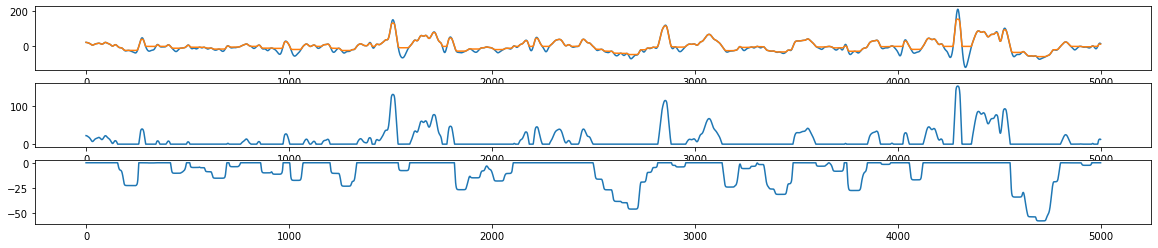

In [43]:
i = 1
plt.figure(figsize=[20,4])
plt.subplot(3,1,1)
plt.plot(f[i*5000:(i+1)*5000])
plt.plot(fpkd[i*5000:(i+1)*5000]+fptd[i*5000:(i+1)*5000])
plt.subplot(3,1,2)
plt.plot(fpkd[i*5000:(i+1)*5000])
plt.subplot(3,1,3)
plt.plot(fptd[i*5000:(i+1)*5000])

In [35]:
x = f
i = 2
n = 4
plt.figure(figsize=[20,10])

plt.subplot(n, 1, 1)
plt.plot(x[i*5000:(i+1)*5000])
plt.title('x')

x_o = Opening(x, g1)
plt.subplot(n, 1, 2)
plt.plot(x_o[i*5000:(i+1)*5000])
plt.title('x_o')

x_o_c = Closing(x_o, g2)
plt.subplot(n, 1, 3)
plt.plot(x_o_c[i*5000:(i+1)*5000])
plt.title('x_o_c')

x_pkd = x_o - x_o_c
plt.subplot(n, 1, 4)
plt.plot(x_pkd[i*5000:(i+1)*5000])
plt.title('x_pkd')

ValueError: operands could not be broadcast together with shapes (1027296,) (1026976,) 